# Part I — Exploratory Data Analysis
### Prosper Loan Dataset
**By: Reema Kusa**

This notebook explores the Prosper Loan Dataset through systematic exploratory data visualization.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

LoanStatus_order = ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','FinalPaymentInProgress','Cancelled']
print('Libraries loaded.')

Libraries loaded.


In [21]:
DATA_PATHS=[Path('data/prosperLoanData.csv'),Path('prosperLoanData.csv'),Path('/mnt/data/prosperLoanData.csv')]
csv_path=None
for p in DATA_PATHS:
    if p.exists(): csv_path=p; break
if csv_path is None: raise FileNotFoundError('Dataset not found.')
df=pd.read_csv(csv_path)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [22]:
print(df.shape)
df.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [23]:
cols_needed=['LoanStatus','LoanOriginalAmount','BorrowerRate','IncomeRange','Term','Occupation','ProsperRating (Alpha)','CreditScoreRangeUpper','ListingCategory (numeric)']
df_small=df[cols_needed].copy()
df_small.head()

,LoanStatus,LoanOriginalAmount,BorrowerRate,IncomeRange,Term,Occupation,ProsperRating (Alpha),CreditScoreRangeUpper,ListingCategory (numeric)
0,Completed,9425,0.1580,"$25,000-49,999",36,Other,NaN,659.0,0
1,Current,10000,0.0920,"$50,000-74,999",36,Professional,A,699.0,2
2,Completed,3001,0.2750,Not displayed,36,Other,NaN,499.0,0
3,Current,10000,0.0974,"$25,000-49,999",36,Skilled Labor,A,819.0,16
4,Current,15000,0.2085,"$100,000+",36,Executive,D,699.0,2


In [24]:
df_small['LoanStatus']=pd.Categorical(df_small['LoanStatus'], categories=LoanStatus_order, ordered=True)
df_small['ProsperRating (Alpha)']=pd.Categorical(df_small['ProsperRating (Alpha)'], categories=['HR','E','D','C','B','A','AA'], ordered=True)
df_small['IncomeRange']=df_small['IncomeRange'].replace(['Not employed','Not displayed'], np.nan)
df_small.head()

,LoanStatus,LoanOriginalAmount,BorrowerRate,IncomeRange,Term,Occupation,ProsperRating (Alpha),CreditScoreRangeUpper,ListingCategory (numeric)
0,Completed,9425,0.1580,"$25,000-49,999",36,Other,NaN,659.0,0
1,Current,10000,0.0920,"$50,000-74,999",36,Professional,A,699.0,2
2,Completed,3001,0.2750,NaN,36,Other,NaN,499.0,0
3,Current,10000,0.0974,"$25,000-49,999",36,Skilled Labor,A,819.0,16
4,Current,15000,0.2085,"$100,000+",36,Executive,D,699.0,2


In [25]:
def plot_hist_with_mean(data,column,bins=40,title=None):
    plt.figure(figsize=(10,6))
    sns.histplot(data[column].dropna(), bins=bins, kde=False)
    mean_val=data[column].mean()
    plt.axvline(mean_val,color='red',linestyle='--',label=f"Mean: {mean_val:.2f}")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

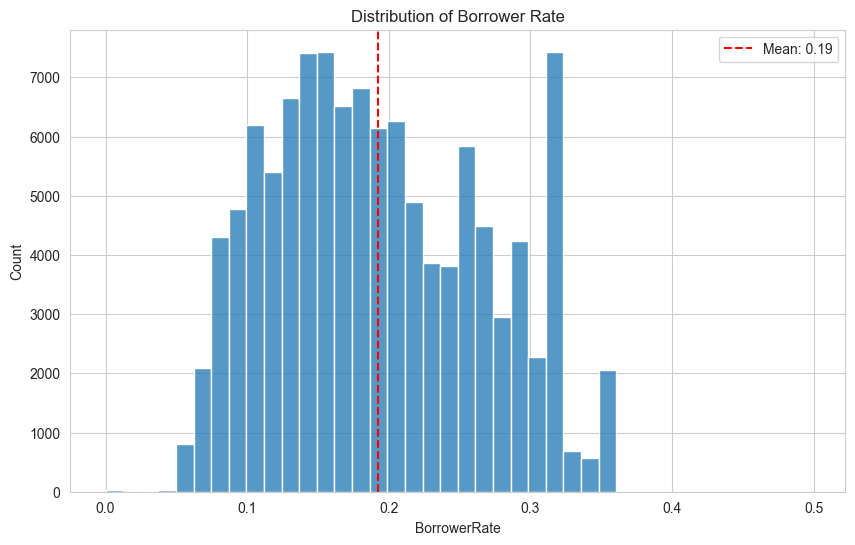

In [26]:
plot_hist_with_mean(df_small, 'BorrowerRate', title='Distribution of Borrower Rate')


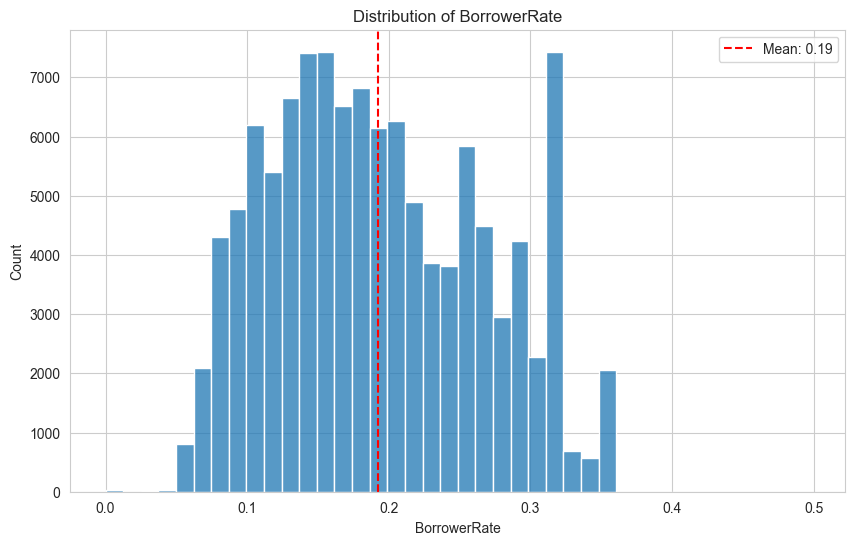

In [27]:
plot_hist_with_mean(df_small, 'BorrowerRate', title='Distribution of BorrowerRate')


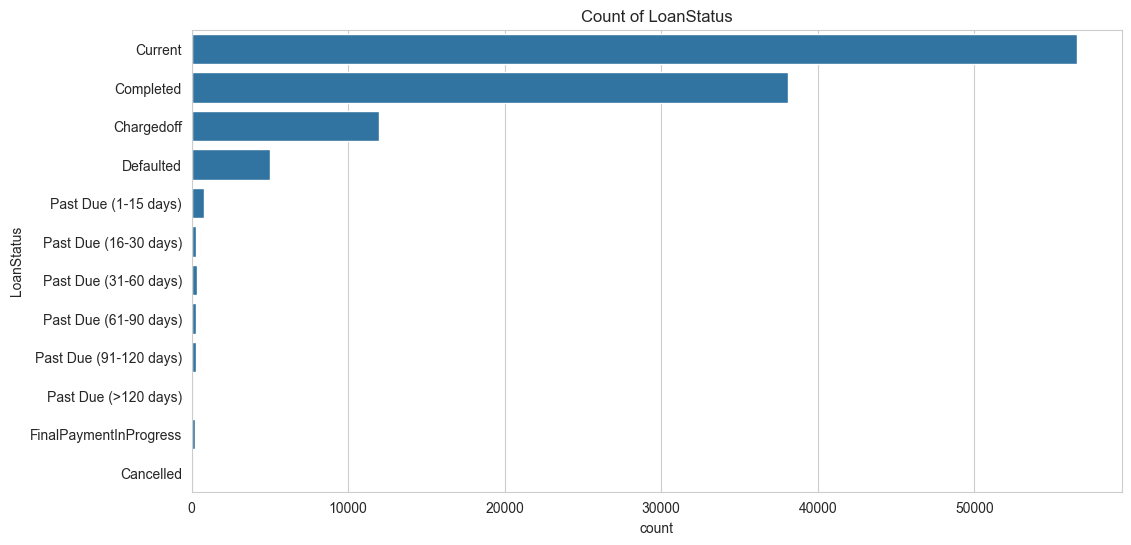

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_small,y='LoanStatus',order=LoanStatus_order)
plt.title('Count of LoanStatus')
plt.show()

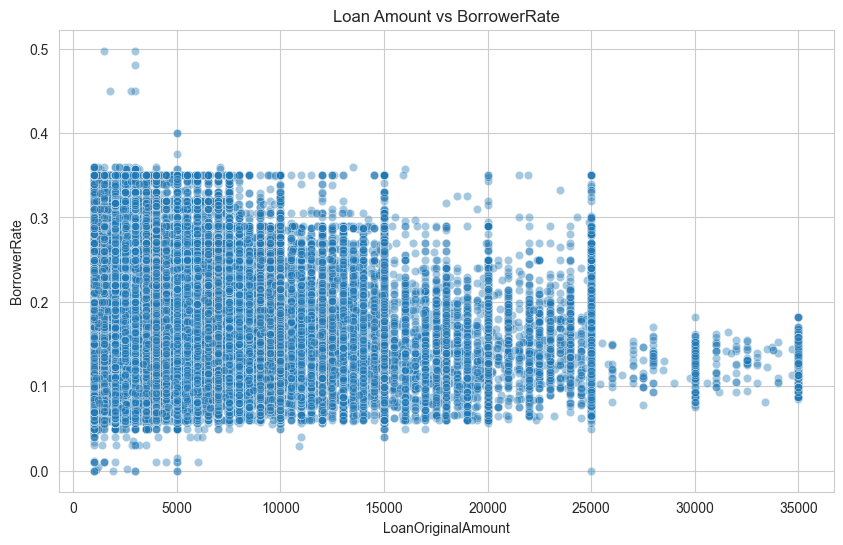

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_small, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.4)
plt.title('Loan Amount vs BorrowerRate')
plt.show()

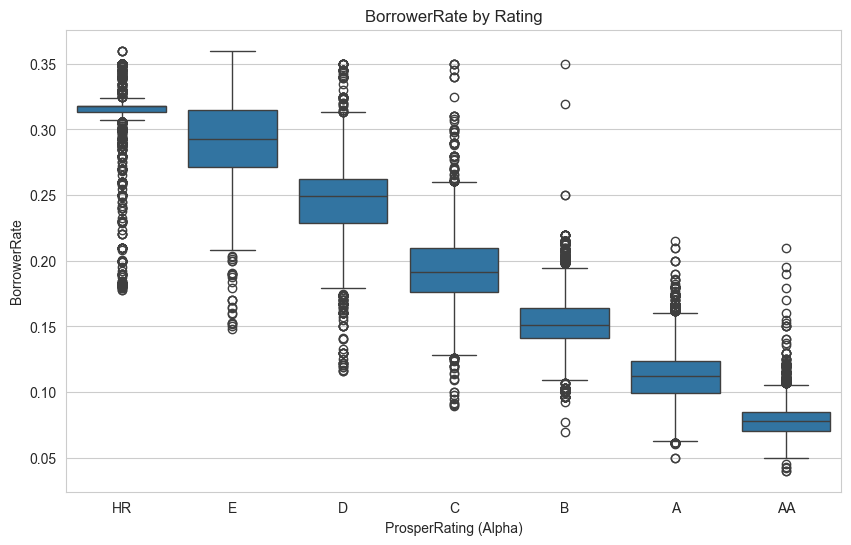

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_small, x='ProsperRating (Alpha)', y='BorrowerRate')
plt.title('BorrowerRate by Rating')
plt.show()

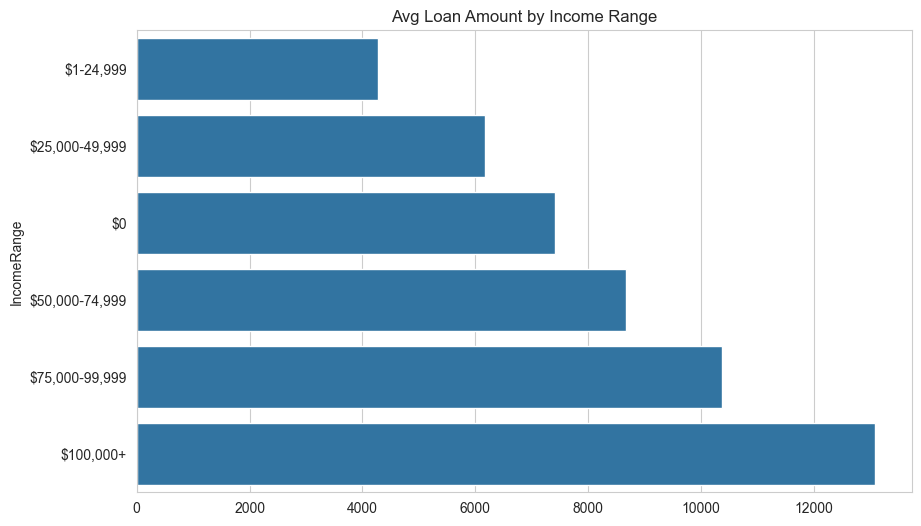

In [31]:
income_summary=df_small.groupby('IncomeRange')['LoanOriginalAmount'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=income_summary.values, y=income_summary.index)
plt.title('Avg Loan Amount by Income Range')
plt.show()

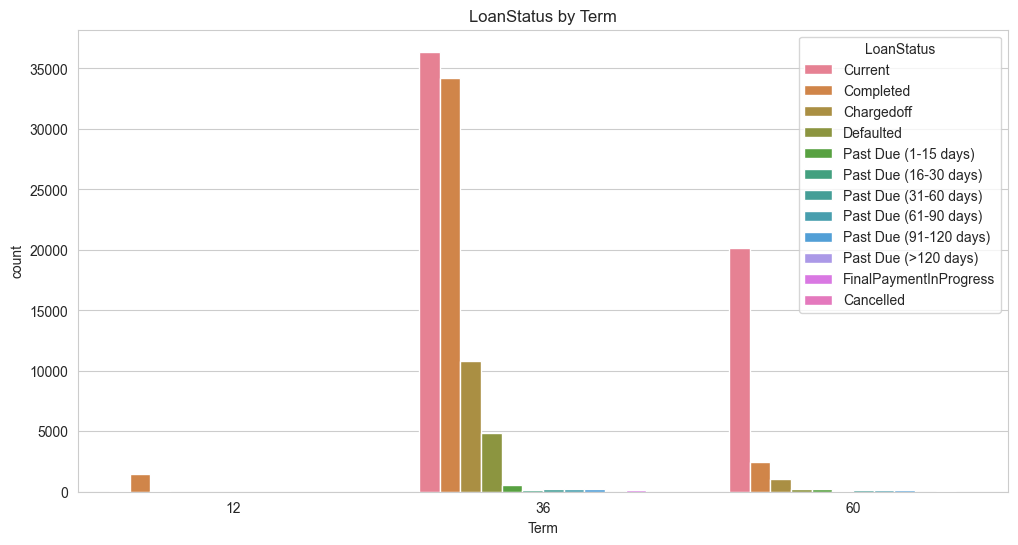

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_small,x='Term',hue='LoanStatus',hue_order=LoanStatus_order)
plt.title('LoanStatus by Term')
plt.show()

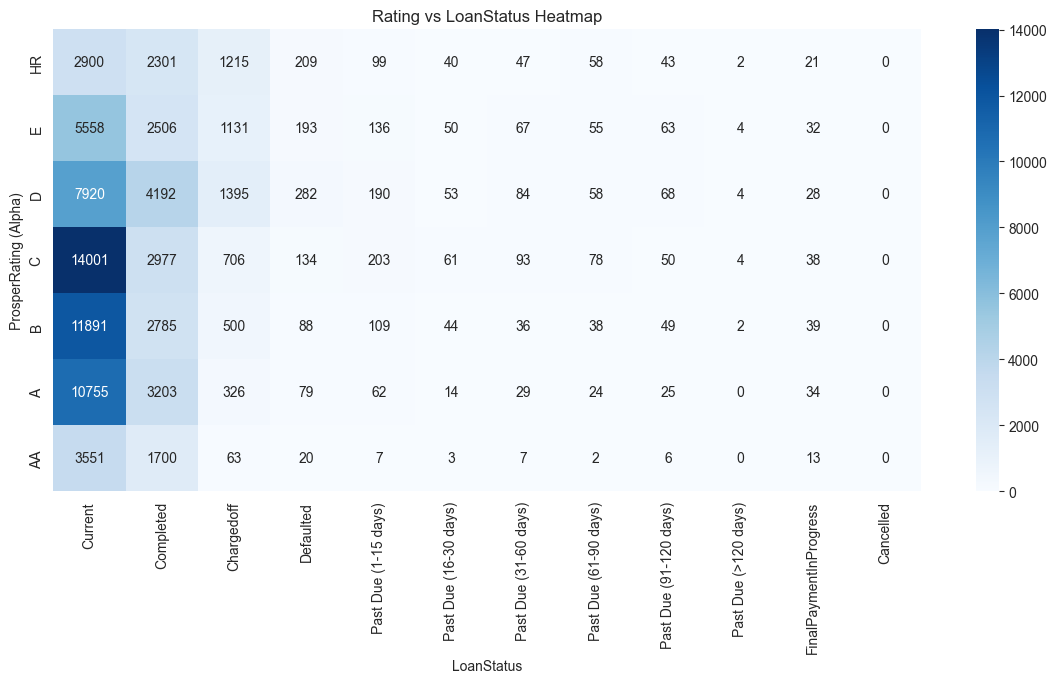

In [34]:
heat = pd.crosstab(
    df_small['ProsperRating (Alpha)'],
    df_small['LoanStatus']
).reindex(columns=LoanStatus_order)

# Fix: convert to int to avoid fmt='d' error
heat = heat.fillna(0).astype(int)

plt.figure(figsize=(14,6))
sns.heatmap(heat, annot=True, fmt='d', cmap='Blues')
plt.title('Rating vs LoanStatus Heatmap')
plt.show()


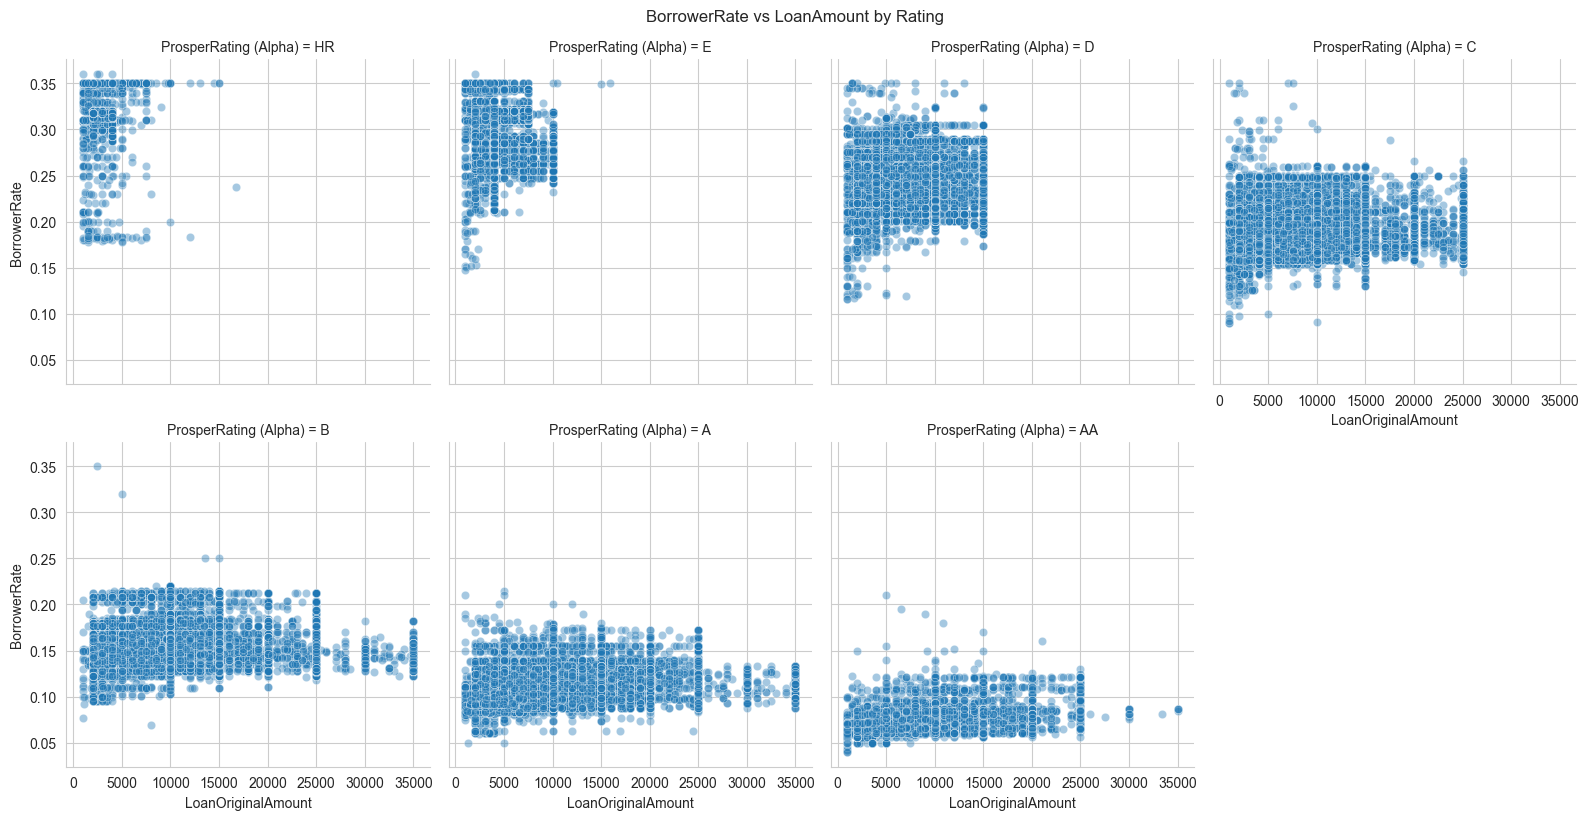

In [35]:
g=sns.FacetGrid(df_small,col='ProsperRating (Alpha)',col_wrap=4,height=4)
g.map_dataframe(sns.scatterplot,x='LoanOriginalAmount',y='BorrowerRate',alpha=0.4)
g.fig.suptitle('BorrowerRate vs LoanAmount by Rating',y=1.02)
plt.show()

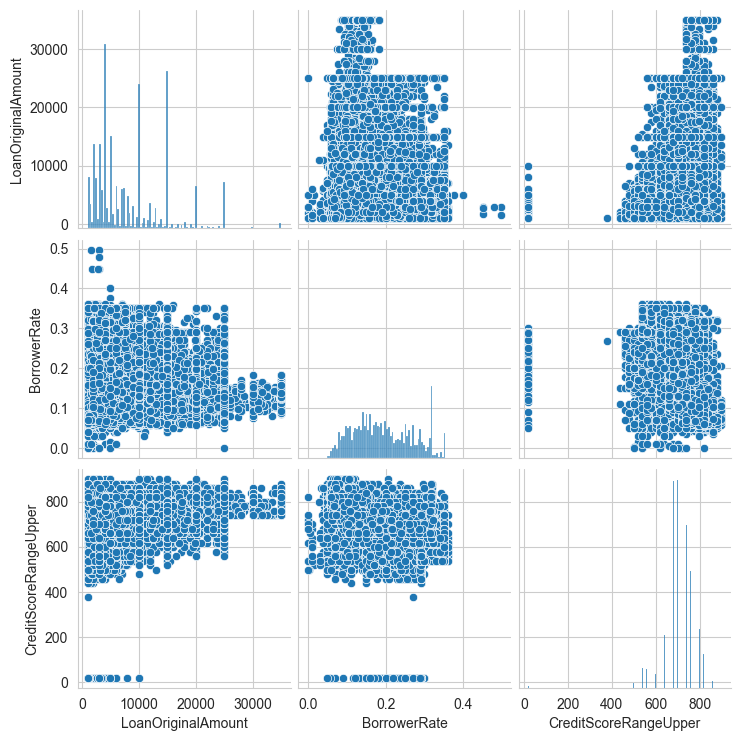

In [36]:
sns.pairplot(df_small[['LoanOriginalAmount','BorrowerRate','CreditScoreRangeUpper']],diag_kind='hist')
plt.show()

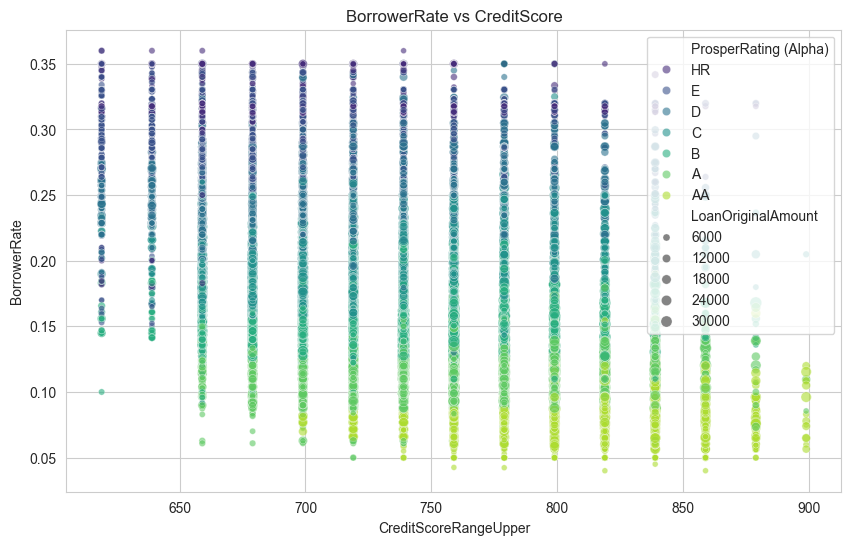

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_small,x='CreditScoreRangeUpper',y='BorrowerRate',size='LoanOriginalAmount',hue='ProsperRating (Alpha)',palette='viridis',alpha=0.6)
plt.title('BorrowerRate vs CreditScore')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_25428\2902511870.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cluster=df_small.pivot_table(values='LoanOriginalAmount',index='ProsperRating (Alpha)',columns='LoanStatus',aggfunc='mean').reindex(columns=LoanStatus_order)


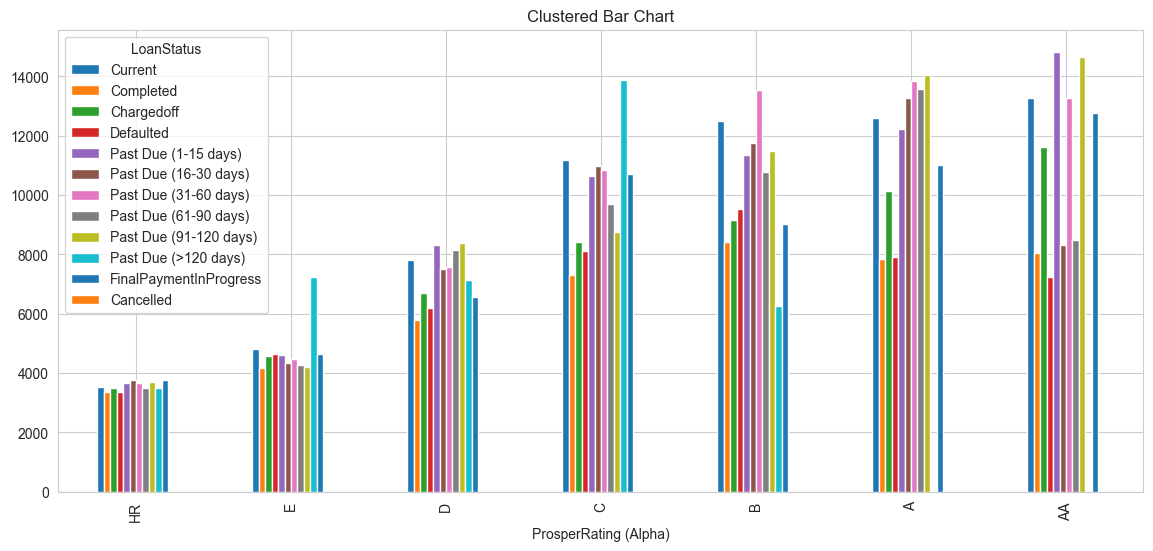

In [38]:
cluster=df_small.pivot_table(values='LoanOriginalAmount',index='ProsperRating (Alpha)',columns='LoanStatus',aggfunc='mean').reindex(columns=LoanStatus_order)
cluster.plot(kind='bar',figsize=(14,6))
plt.title('Clustered Bar Chart')
plt.show()

## Summary
Loan amount skewed, borrower rate decreases with rating, income affects loan size, multivariate relations confirm risk factors.